In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords

## Datos

En esta notebook vamos a utilizar datos de Instagram. Los mismos fueron descargados de páginas públicas de Instagram. Tendremos 3 "tipos" de cuentas:

- Fit
- RecetasFit
- Recetas
- Jugadores de fútbol argentinos
- Periodismo deportivo
- Otros deportistas argentinos

Descargaremos todos los posts que las cuentas hayan hecho en los últimos 12 meses.

La idea será ver si estos tipos de cuentas comparten una misma semántica entre sí y si a la vez son muy distintas entre los grupos.

In [2]:
dataFit = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1wEN85LBolVxFKKpNwWZwxb90do60okyN"
)
print(dataFit.columns)
print(dataFit.shape)
dataFit.head()

Index(['Account', 'User Name', 'Followers at Posting', 'Created', 'Type',
       'Likes', 'Comments', 'Views', 'URL', 'Link', 'Photo', 'Title',
       'Description', 'Image Text', 'Sponsor Id', 'Sponsor Name',
       'Overperforming Score'],
      dtype='object')
(1619, 17)


,Account,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,URL,Link,Photo,Title,Description,Image Text,Sponsor Id,Sponsor Name,Overperforming Score
0,RECETAS SALUDABLES | NUTRICION,caloria.fit,660230.0,2020-11-24 08:10:39 EST,Photo,1292,31,0,https://www.instagram.com/p/CH-YUcyHztq/,https://www.instagram.com/p/CH-YUcyHztq/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,🥲🥲🥲,"Cuando vas al gimnasio, pero la cara no mejora...",NaN,NaN,1.18
1,Federico Galassi,feder.gala,23392.0,2020-11-24 08:10:31 EST,Album,52,8,0,https://www.instagram.com/p/CH-YTh0DuDM/,https://www.instagram.com/p/CH-YTh0DuDM/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,LA PARADOJA DE LA DIETA CETOGENICA\n.\nMuchas ...,NaN,NaN,NaN,4.29
2,SomosFit,somosfit,NaN,2020-11-24 06:37:06 EST,Photo,361,8,0,https://www.instagram.com/p/CH-Nm64MXy8/,https://www.instagram.com/p/CH-Nm64MXy8/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,🙌🏻NO JUZGUES DECISIONES AJENAS🙌🏻 detrás de ca...,"Somos NO JUZGUES decisiones ajenas ""¿ESTÁS HAC...",NaN,NaN,1.31
3,RECETAS SALUDABLES | NUTRICION,caloria.fit,660230.0,2020-11-23 20:05:10 EST,Photo,3095,25,0,https://www.instagram.com/p/CH9FS3VnaL-/,https://www.instagram.com/p/CH9FS3VnaL-/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,"No existe el camino corto, cambia tu estilo de...",Alex Fernandez @vlexfit No existe ninguna diet...,NaN,NaN,-1.60
4,Recetas | Ani y Sara,fit_happy_sisters,483667.0,2020-11-23 16:11:45 EST,Album,3376,78,0,https://www.instagram.com/p/CH8qlQ8ljz2/,https://www.instagram.com/p/CH8qlQ8ljz2/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,🍎 VEGAN APPLE BREAD ¡fácil y delicioso! Toca d...,NaN,NaN,NaN,-1.27


In [3]:
dataFit["User Name"].unique()

array(['caloria.fit', 'feder.gala', 'somosfit', 'fit_happy_sisters'],
      dtype=object)

In [4]:
dataRecetasFit = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=13FL4Am8VRVPulISyobQf41IbgCgk2Egn"
)
print(dataRecetasFit.columns)
print(dataRecetasFit.shape)
dataRecetasFit.head()

Index(['Account', 'User Name', 'Followers at Posting', 'Created', 'Type',
       'Likes', 'Comments', 'Views', 'URL', 'Link', 'Photo', 'Title',
       'Description', 'Image Text', 'Sponsor Id', 'Sponsor Name',
       'Overperforming Score'],
      dtype='object')
(3935, 17)


,Account,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,URL,Link,Photo,Title,Description,Image Text,Sponsor Id,Sponsor Name,Overperforming Score
0,Lic. M. Agustina Murcho,nutricion.ag,382855.0,2020-11-24 07:29:11 EST,Photo,777,20,0,https://www.instagram.com/p/CH-TktkD1_Q/,https://www.instagram.com/p/CH-TktkD1_Q/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,💭Siempre estuvo “de moda” el hacer dieta. O má...,Las dietas restrictivas aumentan la Ghrelina. ...,NaN,NaN,-1.23
1,Lic. Estefanía Beltrami 🍓🍍🍏,nutricion.salud.arg,1733611.0,2020-11-24 05:59:41 EST,Photo,2984,31,0,https://www.instagram.com/p/CH-JVPEA7Ku/,https://www.instagram.com/p/CH-JVPEA7Ku/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,👩🏼‍⚕️ A pesar de que ya todos saben que no pro...,EL HPAD CAMINO AL ÉXITO EXPECTATIVA REALIDAD,NaN,NaN,-1.70
2,T i n i,agusazcuy,NaN,2020-11-23 19:49:49 EST,IGTV,160,7,3073,https://www.instagram.com/tv/CH9Df9KD6c9/,https://www.instagram.com/tv/CH9Df9KD6c9/,https://scontent-sea1-1.cdninstagram.com/v/t51...,@casanueza LA PREVIA😍con @caazcuy,NaN,NaN,NaN,NaN,-5.61
3,Lic. M. Agustina Murcho,nutricion.ag,382828.0,2020-11-23 18:33:18 EST,Photo,1755,15,0,https://www.instagram.com/p/CH86x9NDTOf/,https://www.instagram.com/p/CH86x9NDTOf/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,😍Alguna vez probaron ravioles con vegetales? M...,NaN,NaN,NaN,-1.30
4,Coco I 🔜 IIN Health Coach,cocofitzm,NaN,2020-11-23 18:33:10 EST,IGTV,140,1,1646,https://www.instagram.com/tv/CH86ulwDAgW/,https://www.instagram.com/tv/CH86ulwDAgW/,https://scontent-sea1-1.cdninstagram.com/v/t51...,Q&A ✨,NaN,NaN,NaN,NaN,1.68


In [5]:
dataRecetasFit["User Name"].unique()

array(['nutricion.ag', 'nutricion.salud.arg', 'agusazcuy', 'cocofitzm',
       'nutricionamiunes', 'lavieenplant', 'matias.marchetti',
       'sofi.deli', 'thehealthyblogger', 'kale.ar', 'nutri.recipes',
       'camila.kost', 'being.healthyy', 'silvaldemoros', '_hinojo'],
      dtype=object)

In [6]:
dataRecetas = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1k0rSIpL9ycPtGSjZoIDhy6wQG3l6KxuE"
)
print(dataRecetas.shape)
dataRecetas.head()

(4886, 17)


,Account,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,URL,Link,Photo,Title,Description,Image Text,Sponsor Id,Sponsor Name,Overperforming Score
0,Paulina Cocina - Recetas y eso,paulinacocina,2181478,2020-11-23 20:40:29 EST,IGTV,11461,138,206045,https://www.instagram.com/tv/CH9CjmChgL9/,https://www.instagram.com/tv/CH9CjmChgL9/,https://scontent-sea1-1.cdninstagram.com/v/t51...,Wok de verduras - La Caja de Paulina 📦,Esta receta es ideal para cuando querés que al...,NaN,NaN,NaN,-1.42
1,Estefi Colombo,esteficolombo,628499,2020-11-23 19:36:19 EST,Photo,8409,24927,0,https://www.instagram.com/p/CH9B_g4j_8F/,https://www.instagram.com/p/CH9B_g4j_8F/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,🥳Sorteo!!! 20 ‼️ cajas llenas de productos @s...,NaN,NaN,NaN,14.17
2,Valentina,valuramallo,414068,2020-11-23 19:10:10 EST,IGTV,1972,27,31346,https://www.instagram.com/tv/CH8-0l7loo_/,https://www.instagram.com/tv/CH8-0l7loo_/,https://scontent-sea1-1.cdninstagram.com/v/t51...,🤎Parece que sigue el calor Torta con base croc...,"MEGA FACIL, rapida yyyy riquiiisima!! con base...",NaN,NaN,NaN,1.24
3,Cocineros Argentinos,cocinerosarg,1572373,2020-11-23 18:15:13 EST,Album,2348,75,0,https://www.instagram.com/p/CH84tg_AHaL/,https://www.instagram.com/p/CH84tg_AHaL/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,Espectacular PASTEL DE NOVIA SANTIAGUEÑO 🔥 que...,NaN,NaN,NaN,-1.31
4,Jimena Monteverde,jimemonteverde,701757,2020-11-23 17:36:28 EST,IGTV,4513,142,56811,https://www.instagram.com/tv/CH80F9oJ3my/,https://www.instagram.com/tv/CH80F9oJ3my/,https://scontent-sea1-1.cdninstagram.com/v/t51...,ENTRAÑAS AL MALBEC 🍇🍷,"Hermoso día para estar al aire libre, disfruta...",NaN,NaN,NaN,-1.03


In [7]:
dataRecetas["User Name"].unique()

array(['paulinacocina', 'esteficolombo', 'valuramallo', 'cocinerosarg',
       'jimemonteverde', 'ximena_saenz', 'arielrodriguezpalacios',
       'deliascakes', 'marubotanaok', 'unblogderecetas', 'cookvanoyen',
       'agoschinelli', 'inutilisimas', 'teodeliinesias'], dtype=object)

In [8]:
dataJugadoresArg = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1YR1uT4USWgXzemIDWYaLwhSEmulwsUP6"
)
print(dataJugadoresArg.shape)
dataJugadoresArg.head()

(484, 17)


,Account,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,URL,Link,Photo,Title,Description,Image Text,Sponsor Id,Sponsor Name,Overperforming Score
0,Ramon Abila,wanchope_abila9,853995.0,2020-11-22 18:17:02 EST,Album,34162,98,0,https://www.instagram.com/p/CH6UICOJtiX/,https://www.instagram.com/p/CH6UICOJtiX/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,@bocajrsoficial 🏆🤩💙💛💙,NaN,NaN,NaN,-1.79
1,Leonardo Ponzio,leoponzio_ok,1421613.0,2020-11-22 10:26:06 EST,Album,114434,1399,0,https://www.instagram.com/p/CH5eOuzj8Do/,https://www.instagram.com/p/CH5eOuzj8Do/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,@riverplate,NaN,NaN,NaN,1.19
2,Federico Mancuello,mancuello,443746.0,2020-11-21 20:21:45 EST,Album,14281,128,0,https://www.instagram.com/p/CH39mmMMLNr/,https://www.instagram.com/p/CH39mmMMLNr/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,Buen triunfo fuera de casa .!! \nA seguir que ...,NaN,NaN,NaN,1.68
3,Julio Buffarini,buffarini07,710873.0,2020-11-21 17:54:54 EST,Photo,40913,286,0,https://www.instagram.com/p/CH3szCKrjbj/,https://www.instagram.com/p/CH3szCKrjbj/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,Campeón 2019/2020 🔵🟡🔵💪🏆 @bocajrsoficial,NaN,NaN,NaN,1.63
4,Pulga Rodríguez,elpulga.ok,76009.0,2020-11-21 17:48:21 EST,Album,14463,120,0,https://www.instagram.com/p/CH3sDCBHtZa/,https://www.instagram.com/p/CH3sDCBHtZa/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,Seguimos!!! +3 🔴⚫️\n📸 @fedeloute,NaN,NaN,NaN,1.32


In [9]:
dataJugadoresArg["User Name"].unique()

array(['wanchope_abila9', 'leoponzio_ok', 'mancuello', 'buffarini07',
       'elpulga.ok', 'nachofdez90', '__carlitostevez', 'lucaspratto',
       'daricvitaok', 'francoarmani34', 'adrianricardo1993',
       'jonathan_bottinelli'], dtype=object)

In [10]:
dataPeriodistmoDep = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1szz4vhaIIi5QBxZM1ZpIrL0plkuyy6Ek"
)
dataPeriodistmoDep["User Name"].unique()

array(['tycsports', 'espnfcarg', 'diario.ole', 'foxsportsargentina',
       'varskysports', 'libermanmartin', 'chavofucks', 'dflatorre',
       'wolffquique', 'rolfimonte23', 'jpvarsky', 'ruggeri86oficial'],
      dtype=object)

In [11]:
dataotrosDeportistas = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=17-k6vXfQ34T02Mb5-BK-DaezStkj5aRB"
)
print(dataotrosDeportistas.shape)
dataotrosDeportistas["User Name"].unique()

(853, 17)


array(['nadiapodoroska', 'tagliafico3', 'lautaromartinez',
       'chinomaidana.1', 'sponzinibbiomma', 'lucasalario',
       'dieschwartzman', 'delpotrojuan', 'laurogerman'], dtype=object)

Unimos todos los dataframe en uno sólo en el siguiente orden: Fit, recetasFit, Recetas, FutbolArg, PeriodismoDep, otrosDeportistasArg

In [12]:

data = pd.concat(
    [
        dataFit,
        dataRecetasFit,
        dataRecetas,
        dataJugadoresArg,
        dataPeriodistmoDep,
        dataotrosDeportistas,
    ]
)

print(data.shape)
data.head()

(42470, 17)


,Account,User Name,Followers at Posting,Created,Type,Likes,Comments,Views,URL,Link,Photo,Title,Description,Image Text,Sponsor Id,Sponsor Name,Overperforming Score
0,RECETAS SALUDABLES | NUTRICION,caloria.fit,660230.0,2020-11-24 08:10:39 EST,Photo,1292,31,0,https://www.instagram.com/p/CH-YUcyHztq/,https://www.instagram.com/p/CH-YUcyHztq/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,🥲🥲🥲,"Cuando vas al gimnasio, pero la cara no mejora...",NaN,NaN,1.18
1,Federico Galassi,feder.gala,23392.0,2020-11-24 08:10:31 EST,Album,52,8,0,https://www.instagram.com/p/CH-YTh0DuDM/,https://www.instagram.com/p/CH-YTh0DuDM/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,LA PARADOJA DE LA DIETA CETOGENICA\n.\nMuchas ...,NaN,NaN,NaN,4.29
2,SomosFit,somosfit,NaN,2020-11-24 06:37:06 EST,Photo,361,8,0,https://www.instagram.com/p/CH-Nm64MXy8/,https://www.instagram.com/p/CH-Nm64MXy8/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,🙌🏻NO JUZGUES DECISIONES AJENAS🙌🏻 detrás de ca...,"Somos NO JUZGUES decisiones ajenas ""¿ESTÁS HAC...",NaN,NaN,1.31
3,RECETAS SALUDABLES | NUTRICION,caloria.fit,660230.0,2020-11-23 20:05:10 EST,Photo,3095,25,0,https://www.instagram.com/p/CH9FS3VnaL-/,https://www.instagram.com/p/CH9FS3VnaL-/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,"No existe el camino corto, cambia tu estilo de...",Alex Fernandez @vlexfit No existe ninguna diet...,NaN,NaN,-1.6
4,Recetas | Ani y Sara,fit_happy_sisters,483667.0,2020-11-23 16:11:45 EST,Album,3376,78,0,https://www.instagram.com/p/CH8qlQ8ljz2/,https://www.instagram.com/p/CH8qlQ8ljz2/,https://scontent-sea1-1.cdninstagram.com/v/t51...,NaN,🍎 VEGAN APPLE BREAD ¡fácil y delicioso! Toca d...,NaN,NaN,NaN,-1.27


Ahora agruparemos por cuenta todos los posts, concatenando todos los textos de los posts por cada usuario.

In [13]:
usuarios = pd.DataFrame()
usuarios["User_Name"] = data["User Name"].unique()
usuarios["numberOfPosts"] = [
    data["User Name"].value_counts()[user] for user in usuarios["User_Name"]
]
usuarios["Description"] = [
    data[data["User Name"] == user].Description.str.cat(sep=". ")
    for user in usuarios["User_Name"]
]
usuarios["ImageText"] = [
    data[data["User Name"] == user]["Image Text"].str.cat(sep=". ")
    for user in usuarios["User_Name"]
]  # No anda tan bien
usuarios["Titles"] = [
    data[data["User Name"] == user].Title.str.cat(sep=". ")
    for user in usuarios["User_Name"]
]
usuarios["AllText"] = (
    usuarios["Description"] + usuarios["Titles"] + usuarios["ImageText"]
)
usuarios["Likes"] = [
    np.sum(data[data["User Name"] == user].Likes) for user in usuarios["User_Name"]
]
usuarios["mean_Likes"] = [
    np.mean(data[data["User Name"] == user].Likes) for user in usuarios["User_Name"]
]
usuarios["Comments"] = [
    np.sum(data[data["User Name"] == user].Comments) for user in usuarios["User_Name"]
]
usuarios["mean_Comments"] = [
    np.mean(data[data["User Name"] == user].Comments) for user in usuarios["User_Name"]
]

usuarios.head()

,User_Name,numberOfPosts,Description,ImageText,Titles,AllText,Likes,mean_Likes,Comments,mean_Comments
0,caloria.fit,774,"🥲🥲🥲. No existe el camino corto, cambia tu esti...","Cuando vas al gimnasio, pero la cara no mejora...",,"🥲🥲🥲. No existe el camino corto, cambia tu esti...",4848536,6264.258398,107966,139.490956
1,feder.gala,97,LA PARADOJA DE LA DIETA CETOGENICA\n.\nMuchas ...,QUE DICE LA CIENCIA SOBRE EL USO DE ACEITE DE ...,¿SE PUEDE GANAR MUSCULO HACIENDO AYUNOS?. ALIM...,LA PARADOJA DE LA DIETA CETOGENICA\n.\nMuchas ...,44324,456.948454,2561,26.402062
2,somosfit,523,🙌🏻NO JUZGUES DECISIONES AJENAS🙌🏻 detrás de ca...,"Somos NO JUZGUES decisiones ajenas ""¿ESTÁS HAC...",,🙌🏻NO JUZGUES DECISIONES AJENAS🙌🏻 detrás de ca...,355606,679.934990,10244,19.586998
3,fit_happy_sisters,225,🍎 VEGAN APPLE BREAD ¡fácil y delicioso! Toca d...,¡VUELVE SENTIRTE BIEN YA! PLAN HEALTHY 15 DÍAS...,"PLAN HEALTHY 15 DÍAS. 🍕🍕Pizza SIN HARINA, SIN ...",🍎 VEGAN APPLE BREAD ¡fácil y delicioso! Toca d...,1212243,5387.746667,130725,581.000000
4,nutricion.ag,648,💭Siempre estuvo “de moda” el hacer dieta. O má...,Las dietas restrictivas aumentan la Ghrelina. ...,❌Productos milagro y publicidad engañosa❌. 💌Ca...,💭Siempre estuvo “de moda” el hacer dieta. O má...,2387238,3684.009259,119675,184.683642


In [14]:
usuarios.tail()

,User_Name,numberOfPosts,Description,ImageText,Titles,AllText,Likes,mean_Likes,Comments,mean_Comments
61,sponzinibbiomma,111,Gracias por acompañarnos.... Gracias por acomp...,7 UFC ufcespanol. UFC. WITHIN. TOP AMERICAN TE...,🔥UFC 255🔥. 🔥UFC 255🔥. 🔥UFC 255🔥. Que noche 🔥🔥...,Gracias por acompañarnos.... Gracias por acomp...,566792,5106.234234,11429,102.963964
62,lucasalario,63,Un partido complicado hasta el final. Tres pun...,JAKO Barmen,,Un partido complicado hasta el final. Tres pun...,2951684,46852.126984,22870,363.015873
63,dieschwartzman,127,Objetivos cumplidos y sueños cumplidos de juga...,sopen. 13:26 < 29285840241 Mensaje de texto ho...,Ultima practica en Bahamas. Mañana rumbo al @u...,Objetivos cumplidos y sueños cumplidos de juga...,4024410,31688.267717,47067,370.606299
64,delpotrojuan,13,Gracias por los hermosos mensajes de cumpleaño...,Allianz 278,Rehabilitación rodilla,Gracias por los hermosos mensajes de cumpleaño...,1368533,105271.769231,26749,2057.615385
65,laurogerman,9,Nada puede detener lo que podemos hacer juntos...,Allianz 278. tu primer hazaña allélica Junto a...,El #equipoArg les dice gracias!. #PlayForTheWorld,Nada puede detener lo que podemos hacer juntos...,6849,761.000000,230,25.555556


Veamos cuantos usuarios obtengo

In [15]:
usuarios.shape

(66, 10)

Veamos cual es el mínimo y máximo de posts por usuario

In [16]:
print(usuarios.numberOfPosts.min(), usuarios.numberOfPosts.max())

9 14156


Seteo 10 posts como mínimo para tener un mínimo de información por cuenta

In [17]:
numberOfPosts_minimo = 10

In [18]:
print(len(usuarios.numberOfPosts), sum(usuarios.numberOfPosts > numberOfPosts_minimo))

66 65


In [19]:
usuarios_mini = usuarios[usuarios.numberOfPosts > numberOfPosts_minimo]

## TF - IDF

In [20]:
import nltk

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# Carga de datos
texts = list(usuarios_mini.AllText)

# Cuento los terminos
count_vect = CountVectorizer(
    ngram_range=(1, 3),
    max_df=0.8,
    min_df=0.01,
    stop_words=stopwords.words('spanish'),
    lowercase=True,
)
x_counts = count_vect.fit_transform(texts)

# Genero matriz con valorizacion tf-idf
tfidf_transformer = TfidfTransformer(norm='l2')
x_tfidf = tfidf_transformer.fit_transform(x_counts)

In [23]:
np.shape(x_tfidf)

(65, 2231907)

## Armo la red


Ahora creo un grafo, donde cada nodo es una cuenta y una arista los une si la similitud entre sus vectores de TF-IDF es mayor a la media + 1 desvío estándar.
La idea es modelar mediante un grafo las conexiones "semánticas" de cada cuenta.

In [24]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

Creo el grafo, poniendo un nodo por cuenta (sin aristas por el momento) y agregando el atributo "User_Name" para después saber que nodo pertenece a que cuenta.

In [25]:
# Inicializo el grafo
G = nx.Graph()
G.add_nodes_from(
    [
        (i, {"User_Name": usuarios_mini.User_Name.iloc[i]})
        for i in range(usuarios_mini.shape[0])
    ]
)
len(G.nodes)

65

Defino la función para calcular de forma matricial todos los pares de similitudes

In [26]:
from numpy import dot
from numpy.linalg import norm

In [27]:
def calcular_similitudes(x_tfidf):
    x1 = x_tfidf.toarray()
    normx1 = np.apply_along_axis(norm, 1, x1)
    normx2 = np.apply_along_axis(norm, 0, x1.T)
    x2 = x1.T
    similitudes = dot(x1, x2) / dot(
        normx1.reshape(x1.shape[0], 1), normx2.reshape(1, x1.shape[0])
    )
    np.fill_diagonal(similitudes, 0)
    return np.round(similitudes, decimals=6)

In [28]:
similitudes = calcular_similitudes(x_tfidf)
similitudes

array([[0.      , 0.154549, 0.172297, ..., 0.008587, 0.013889, 0.007722],
       [0.154549, 0.      , 0.134746, ..., 0.017109, 0.020123, 0.028548],
       [0.172297, 0.134746, 0.      , ..., 0.010187, 0.024226, 0.012469],
       ...,
       [0.008587, 0.017109, 0.010187, ..., 0.      , 0.0202  , 0.061024],
       [0.013889, 0.020123, 0.024226, ..., 0.0202  , 0.      , 0.010381],
       [0.007722, 0.028548, 0.012469, ..., 0.061024, 0.010381, 0.      ]])

Defino el umbral (media + 1 desvío estándar) para establecer una arista entre los nodos y agrego todas las aristas correspondientes según este criterio.

In [29]:
# Agrego aristas
treshold = similitudes.mean() + 1 * similitudes.std()
print("treshold: {:.5f}".format(treshold))

edges = list(G.edges)
G.remove_edges_from(edges)  # borro viejas, por si habia algo


for i in range(usuarios_mini.shape[0]):
    for j in range(usuarios_mini.shape[0]):
        if similitudes[i, j] > treshold:
            G.add_edge(i, j, weight=similitudes[i, j])
len(G.edges)

treshold: 0.14936


266

Grafico la matriz de similitudes mediante un heatmap binario.

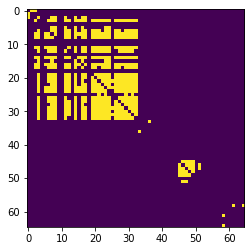

In [30]:
# plot matriz similitud
plt.imshow(similitudes > treshold)
plt.show()

## Detecta comunidades

Ahora pasaré a detectar comunidades en el grafo creado. Para esto utilizó el método "Louvain", el cual es una técnica greedy de detección de clusters en grafos (no lo vimos en la materia)

In [31]:
from networkx.algorithms import community
import community as com

In [32]:
partition = com.best_partition(G)

Me fijo cuales son las 10 principales comunidades y cuantos usuarios tiene cada una

In [33]:
comunidad = []
for i in range(usuarios_mini.shape[0]):
    comunidad.append(partition[i])
usuarios_mini["comunidad"] = comunidad
usuarios_mini["comunidad"].value_counts().head(10)

/opt/hostedtoolcache/Python/3.7.10/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


7     14
1     12
19     6
27     3
0      2
8      2
12     1
11     1
10     1
9      1
Name: comunidad, dtype: int64

Veamos ahora que usuarios componen cada uno de estas comunidades (las que tienen mas de 2 usuarios)

In [34]:
usuarios_mini[usuarios_mini.comunidad == 7].sort_values(
    "mean_Likes", ascending=False
).User_Name.head(10)

19             paulinacocina
31              inutilisimas
20             esteficolombo
27              marubotanaok
23            jimemonteverde
25    arielrodriguezpalacios
21               valuramallo
26               deliascakes
29               cookvanoyen
22              cocinerosarg
Name: User_Name, dtype: object

In [35]:
usuarios_mini[usuarios_mini.comunidad == 1].sort_values(
    "mean_Likes", ascending=False
).User_Name.head(10)

5     nutricion.salud.arg
15            camila.kost
3       fit_happy_sisters
12      thehealthyblogger
16         being.healthyy
14          nutri.recipes
11              sofi.deli
8        nutricionamiunes
6               agusazcuy
2                somosfit
Name: User_Name, dtype: object

In [36]:
usuarios_mini[usuarios_mini.comunidad == 19].sort_values(
    "mean_Likes", ascending=False
).User_Name.head(10)

45             tycsports
47            diario.ole
46             espnfcarg
51            chavofucks
49          varskysports
48    foxsportsargentina
Name: User_Name, dtype: object

In [37]:
usuarios_mini[usuarios_mini.comunidad == 27].sort_values(
    "mean_Likes", ascending=False
).User_Name.head(10)

64       delpotrojuan
58        tagliafico3
61    sponzinibbiomma
Name: User_Name, dtype: object

# Ploteo la red a ver como agrupa

In [38]:
colors = ["b", "r", "y", "g"] + ["w"] * 1000
dic_colores = {}
for i, key in enumerate(usuarios_mini["comunidad"].value_counts().index):
    dic_colores[key] = colors[i]

In [39]:
color_map = []
for user in list(nx.get_node_attributes(G, 'User_Name').values()):
    com = int(usuarios_mini[usuarios_mini.User_Name == user].comunidad)
    color_map.append(dic_colores[com])

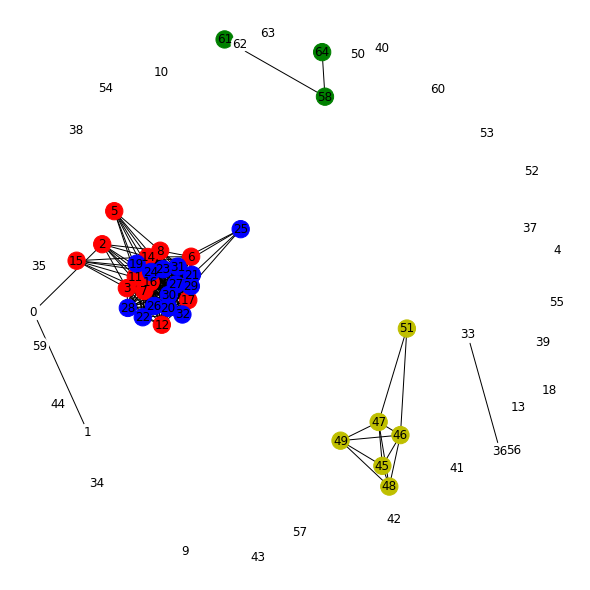

In [40]:
plt.figure(figsize=[8, 8])
# pos = nx.draw_kamada_kawai(G) #draw_kamada_kawai draw_spectral draw_circular draw_spring
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.show()

In [41]:
G.nodes[47]['User_Name']

'diario.ole'